



cc







In [13]:
import sys

print(sys.version)
sys.path

3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]


['c:\\Users\\kamal\\Desktop\\Mind\\S2\\forecasting_models',
 'c:\\Users\\kamal\\.vscode\\extensions\\ms-toolsai.jupyter-2021.3.684299474\\pythonFiles',
 'c:\\Users\\kamal\\.vscode\\extensions\\ms-toolsai.jupyter-2021.3.684299474\\pythonFiles\\lib\\python',
 'C:\\Users\\kamal\\anaconda3\\envs\\HMMA238_env\\python38.zip',
 'C:\\Users\\kamal\\anaconda3\\envs\\HMMA238_env\\DLLs',
 'C:\\Users\\kamal\\anaconda3\\envs\\HMMA238_env\\lib',
 'C:\\Users\\kamal\\anaconda3\\envs\\HMMA238_env',
 '',
 'C:\\Users\\kamal\\anaconda3\\envs\\HMMA238_env\\lib\\site-packages',
 'C:\\Users\\kamal\\anaconda3\\envs\\HMMA238_env\\lib\\site-packages\\win32',
 'C:\\Users\\kamal\\anaconda3\\envs\\HMMA238_env\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\kamal\\anaconda3\\envs\\HMMA238_env\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\kamal\\anaconda3\\envs\\HMMA238_env\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\kamal\\.ipython']

In [14]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from ipywidgets import interact 
from matplotlib import pyplot as plt

from datetime import datetime
from scipy import stats as st
import json
from pandas import json_normalize
from ipywidgets import interact



In [15]:
from download import download



In [16]:
#Database import 
url = [
#Celleneuve
    'https://data.montpellier3m.fr/sites/default/files/ressources/MMM_EcoCompt_X2H20042633_archive.json',
#Lattes2
    'https://data.montpellier3m.fr/sites/default/files/ressources/MMM_EcoCompt_X2H20042634_archive.json',
]

path_target0 = "./data_visulization/Celleneuve.json"
path_target1 = "./data_visulization/Lattes2.json"
download(url[0], path_target0, replace=False)
download(url[1], path_target1, replace=False)




file_sizes: 100%|███████████████████████████| 28.5k/28.5k [00:00<00:00, 838kB/s]
Successfully downloaded file to ./data_visulization/Celleneuve.json

file_sizes: 100%|███████████████████████████| 28.4k/28.4k [00:00<00:00, 827kB/s]
Successfully downloaded file to ./data_visulization/Lattes2.json


'./data_visulization/Lattes2.json'

In [22]:
#Read .Json data as dataframe
bike_traffic_df1 = pd.read_json('./data_visulization/Celleneuve.json', lines=True)
bike_traffic_df2 = pd.read_json('./data_visulization/lattes2.json', lines=True)
#bike_traffic_df1 = pd.read_json('bike_traffic1.json', lines=True)
#bike_traffic_df2 = pd.read_json('bike_traffic.json', lines=True)

#Display of the first 3 lines 
bike_traffic_df1.head(n=3)
bike_traffic_df2.head(n=2)



ValueError: Unexpected character found when decoding array value (2)

In [18]:
#-------- 
from pandas import Series


#Split 'dateObserved' column into two columns 
data_test=bike_traffic_df1.join(bike_traffic_df1['dateObserved'].apply(lambda x: Series(x.split('/'))))
data_test=data_test.rename(columns = {0: 'start_of_day', 1: 'end_of_day'}) 

#replace the 'T' between date and time with a space 
data_test['end_of_day'] = data_test['end_of_day'].str.replace('T',' ')

#Convert to time series 
time_improved = pd.to_datetime(data_test['end_of_day'] , format='%Y-%m-%d %H:%M:%S')               

#Indexing data by 'end_of-day' (time series)
data_test['end_of_day'] = time_improved
data_test = data_test.set_index(['end_of_day'])

In [23]:

# Rename intensity column by position name
bike_traffic_df=bike_traffic_df1.rename(columns = {'intensity': 'Celleneuve'})
bike_traffic_df1=bike_traffic_df2.rename(columns = {'intensity': 'Lattes2'}) 

#Extract the renamed columns, and combine them into a new dataframe 
data_test22 = pd.DataFrame([bike_traffic_df['Celleneuve'], bike_traffic_df1['Lattes2']])
data_test22=data_test22.T

#Indexing neww data by 'end_of-day' (time series)
data_test22['startday'] = time_improved
data_test22 = data_test22.set_index(['startday'])
print(data_test22)


            Celleneuve  Lattes2
startday                       
2020-12-18        53.0    405.0
2020-12-19        50.0    450.0
2020-12-20        44.0    346.0
2020-12-21        31.0    283.0
2020-12-22        63.0    484.0
...                ...      ...
2021-03-26       148.0    783.0
2021-03-27       110.0    645.0
2021-03-28       110.0    454.0
2021-03-29       112.0    425.0
2021-03-30       129.0      NaN

[103 rows x 2 columns]


interactive(children=(Dropdown(description='pos', options=('Celleneuve', 'Lattes2'), value='Celleneuve'), Drop…

<function __main__.hist_explore(pos='latte1', alpha='d', bw=1)>

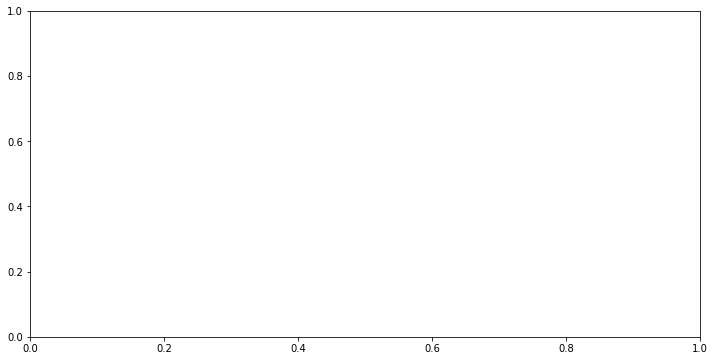

In [19]:

def hist_explore( pos ='latte1', alpha = 'd', bw=1 ):

  
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    ax.plot(data_test22[pos].resample( alpha ).mean(), '-*')
    #ax.hist(df_titanic['Age'], density=density,
            #bins=n_bins, alpha=alpha)  # standardization
    plt.xlabel('Age')
    plt.ylabel('Density level')
    plt.title("Histogram for passengers age")
    plt.tight_layout()
    plt.show()


interact(hist_explore ,pos=['Celleneuve','Lattes2'] ,alpha=['d','m'],bw=(1, 6, 1))